# Laboratory - Atheism

## Inference for categorical data

In August of 2012, news outlets ranging from the [Washington Post](http://www.washingtonpost.com/national/on-faith/poll-shows-atheism-on-the-rise-in-the-us/2012/08/13/90020fd6-e57d-11e1-9739-eef99c5fb285_story.html) to the [Huffington Post](http://www.huffingtonpost.com/2012/08/14/atheism-rise-religiosity-decline-in-america_n_1777031.html) ran a story about the rise of atheism in America. The source for the story was a poll that asked people, “Irrespective of whether you attend a place of worship or not, would you say you are a religious person, not a religious person or a convinced atheist?” This type of question, which asks people to classify themselves in one way or another, is common in polling and generates categorical data. In this lab we take a look at the atheism survey and explore what’s at play when making inference about population proportions using categorical data.

## The survey

To access the press release for the poll, conducted by WIN-Gallup International, click on the following [link](https://github.com/OpenIntroStat/oilabs/blob/master/data-raw/atheism/Global_INDEX_of_Religiosity_and_Atheism_PR__6.pdf).

Take a moment to review the report then address the following questions.

### Exercise 1 - In the first paragraph, several key findings are reported. Do these percentages appear to be sample statistics (derived from the data sample) or population parameters?

It seems to me that these data come from a sample.

### Exercise 2 - The title of the report is “Global Index of Religiosity and Atheism”. To generalize the report’s findings to the global human population, what must we assume about the sampling method? Does that seem like a reasonable assumption?

We must assume random sampling was carried out when selecting the 50,000 partecipants, and it seems reasonable to me if proper stratification was also applied.

## The data

Turn your attention to Table 6 (pages 15 and 16), which reports the sample size and response percentages for all 57 countries. While this is a useful format to summarize the data, we will base our analysis on the original data set of individual responses to the survey. Load this data set into R with the following command.

In [19]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from scipy import stats as st 
import statsmodels.stats.api as sms

from pathlib import Path

sns.set_theme()

if not Path("./atheism.csv").exists():
    ! curl https://www.openintro.org/book/statdata/atheism.csv >> atheism.csv

atheism_df = pd.read_csv(Path("atheism.csv"))
atheism_df.sample(10)

,nationality,response,year
165291,Pakistan,non-atheist,2005
158504,Bosnia and Herzegovina,non-atheist,2005
100424,Czech Republic,non-atheist,2012
157483,South Africa,non-atheist,2005
49697,Ukraine,non-atheist,2012
22369,India,non-atheist,2012
93376,Belgium,non-atheist,2012
11946,Colombia,non-atheist,2012
65843,Finland,non-atheist,2005
151578,Italy,non-atheist,2005


### Exercise 3 - What does each row of Table 6 correspond to? What does each row of atheism correspond to?

In Table 6 of the report we see how responses are distributed for each country (each row is a country with its statistics regarding religion in addition to the sample size used to gather those statistics). Each row in atheism is the respondent taking part in the survey.

To investigate the link between these two ways of organizing this data, take a look at the estimated proportion of atheists in the United States. Towards the bottom of Table 6, we see that this is 5%. We should be able to come to the same number using the `atheism` data.

### Exercise 4 - Using the command below, create a new dataframe called us12 that contains only the rows in atheism associated with respondents to the 2012 survey from the United States. Next, calculate the proportion of atheist responses. Does it agree with the percentage in Table 6? If not, why?

In [32]:
us12 = atheism_df.loc[(atheism_df["nationality"] == "United States") & (atheism_df["year"] == "2012"), :]
us12_atheists = us12[us12["response"] == "atheist"].shape[0] / us12.shape[0]

us12_atheists


0.0499001996007984

It does agree indeed with what we calculated.

## Inference on proportions

As was hinted at in Exercise 1, Table 6 provides _statistics_, that is, calculations made from the sample of 51,927 people. What we’d like, though, is insight into the population _parameters_. You answer the question, “What proportion of people in your sample reported being atheists?” with a statistic; while the question “What proportion of people on earth would report being atheists” is answered with an estimate of the parameter.

The inferential tools for estimating population proportion are analogous to those used for means in the last chapter: the confidence interval and the hypothesis test.

### Exercise 5 - Write out the conditions for inference to construct a 95% confidence interval for the proportion of atheists in the United States in 2012. Are you confident all conditions are met?

Since $np = 100$ and $n(1 - p) = 1904$, we comply with the condition for inference.

In [34]:
st.t.interval(
    alpha=0.95, 
    df=us12.shape[0] - 1, 
    loc=np.mean((us12["response"] == "atheist").astype(int)),
    scale=st.sem((us12["response"] == "atheist").astype(int))
)


(0.0403589362845721, 0.05944146291702471)

Note that since the goal is to construct an interval estimate for a proportion, it’s necessary to specify what constitutes a “success”, which here is a response of `"atheist"`.

Although formal confidence intervals and hypothesis tests don’t show up in the report, suggestions of inference appear at the bottom of page 7: “In general, the error margin for surveys of this kind is ± 3-5% at 95% confidence”.

### Exercise 6 - Based on the output, what is the margin of error for the estimate of the proportion of the proportion of atheists in US in 2012?

In [36]:
st.sem((us12["response"] == "atheist").astype(int)) * 1.96

0.009535673040325803

### Exercise 7 - Calculate confidence intervals for the proportion of atheists in 2012 in two other countries of your choice, and report the associated margins of error. Be sure to note whether the conditions for inference are met. It may be helpful to create new data sets for each of the two countries first, and then use these data sets to construct the confidence intervals.

In [48]:
countries = np.random.choice(atheism_df["nationality"].unique(), 2).tolist()

for country in countries:
    country_df = atheism_df[(atheism_df["nationality"] == country) & (atheism_df["year"] == "2012")]
    atheist_p = country_df[country_df["response"] == "atheist"].shape[0] / country_df.shape[0]
    ci = st.t.interval(
        alpha=0.95, 
        df=country_df.shape[0] - 1, 
        loc=np.mean((country_df["response"] == "atheist").astype(int)),
        scale=st.sem((country_df["response"] == "atheist").astype(int))
    )
    print(f"For country {country} we get an atheist proportion of {atheist_p}, with 95% ci of {ci}")


For country Pakistan we get an atheist proportion of 0.019970414201183433, with 95% ci of (0.01624065955355123, 0.023700168848815636)
For country Australia we get an atheist proportion of 0.10009624639076034, with 95% ci of (0.0871813797749056, 0.11301111300661508)


## How does the proportion affect the margin of error?

Imagine you’ve set out to survey 1000 people on two questions: are you female? and are you left-handed? Since both of these sample proportions were calculated from the same sample size, they should have the same margin of error, right? Wrong! While the margin of error does change with sample size, it is also affected by the proportion.

Think back to the formula for the standard error. This is then used in the formula for the margin of error for a 95% confidence interval. Since the population proportion $p$ is in this $ME$ formula, it should make sense that the margin of error is in some way dependent on the population proportion. We can visualize this relationship by creating a plot of $ME$ vs. $p$.

The first step is to make a vector `p` that is a sequence from 0 to 1 with each number separated by 0.01. We can then create a vector of the margin of error (`me`) associated with each of these values of `p` using the familiar approximate formula ($ME=2 \times SE$). Lastly, we plot the two vectors against each other to reveal their relationship.

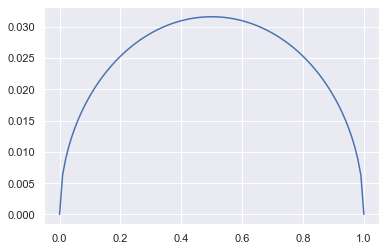

In [50]:
n = 1000
p = np.arange(0, 1.01, 0.01)
me = 2 * np.sqrt(p * (1 - p) / n)
sns.lineplot(x=p, y=me)
plt.show()

The close `p` is to 0.5, the higher the margin of error.

## Success-failure condition

The textbook emphasizes that you must always check conditions before making inference. For inference on proportions, the sample proportion can be assumed to be nearly normal if it is based upon a random sample of independent observations and if both $np≥10$ and $n(1−p)≥10$. This rule of thumb is easy enough to follow, but it makes one wonder: what’s so special about the number 10?

The short answer is: nothing. You could argue that we would be fine with 9 or that we really should be using 11. What is the “best” value for such a rule of thumb is, at least to some degree, arbitrary. However, when $np$ and $n(1−p)$ reaches 10 the sampling distribution is sufficiently normal to use confidence intervals and hypothesis tests that are based on that approximation.

We can investigate the interplay between $n$ and $p$ and the shape of the sampling distribution by using simulations. To start off, we simulate the process of drawing 5000 samples of size 1040 from a population with a true atheist proportion of 0.1. For each of the 5000 samples we compute $p̂$ and then plot a histogram to visualize their distribution.

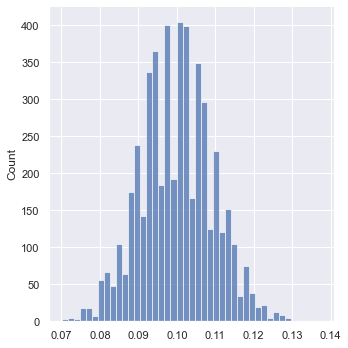

In [70]:
p = 0.1
n = 1040
p_hats = np.array([0.0] * 5000)

for i in range(5000):
    samp = np.random.choice(["atheist", "non-atheist"], n, replace=True, p=[p, 1 - p])
    p_hats[i] = (samp == "atheist").sum() / n

sns.displot(p_hats)
plt.show()

### Exercise 9 - Describe the sampling distribution of sample proportions at $n=1040$ and $p=0.1$. Be sure to note the center, spread, and shape.

The center is in the (assumed) true population proportion of atheists, distributed normally, with a standard deviation equal to the standard error as the next line of code will show.

In [73]:
print(f"Mean of the obtained sample distribution is {p_hats.mean()}, proportion is {p}")
print(f"Std of the obtained sample distribution is {p_hats.std()}, std error is {np.sqrt(p * (1 - p) / n)}")

Mean of the obtained sample distribution is 0.09996980769230769, proportion is 0.1
Std of the obtained sample distribution is 0.00932018065375554, std error is 0.009302605094190635


### Exercise 10 - Repeat the above simulation three more times but with modified sample sizes and proportions: for $n=400$ and $p=0.1$, $n=1040$ and $p=0.02$, and $n=400$ and $p=0.02$. Plot all four histograms together. You may need to expand the plot window to accommodate the larger two-by-two plot. Describe the three new sampling distributions. Based on these limited plots, how does $n$ appear to affect the distribution of $p̂$? How does $p$ affect the sampling distribution?

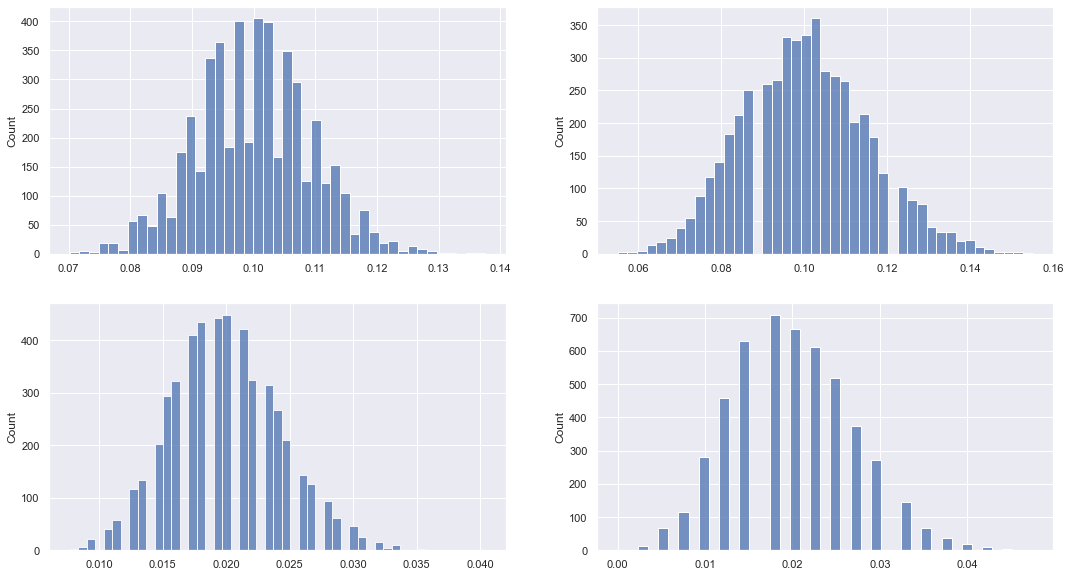

In [100]:
fig, axes = plt.subplots(2, 2, figsize=(18,10))

p = 0.1
n = 400
p_hats_1 = np.array([0.0] * 5000)

for i in range(5000):
    samp = np.random.choice(["atheist", "non-atheist"], n, replace=True, p=[p, 1 - p])
    p_hats_1[i] = (samp == "atheist").sum() / n

p = 0.02
n = 1040
p_hats_2 = np.array([0.0] * 5000)

for i in range(5000):
    samp = np.random.choice(["atheist", "non-atheist"], n, replace=True, p=[p, 1 - p])
    p_hats_2[i] = (samp == "atheist").sum() / n

p = 0.02
n = 400
p_hats_3 = np.array([0.0] * 5000)

for i in range(5000):
    samp = np.random.choice(["atheist", "non-atheist"], n, replace=True, p=[p, 1 - p])
    p_hats_3[i] = (samp == "atheist").sum() / n

sns.histplot(p_hats, ax=axes[0, 0])
sns.histplot(p_hats_1, ax=axes[0, 1])
sns.histplot(p_hats_2, ax=axes[1, 0])
sns.histplot(p_hats_3, ax=axes[1, 1])

plt.show()

The smaller `n`, the distribution seems more spreaded (i.e. the $SE$ is greater). The closer `p` to 0.5, the greater the spread.

### Exercise 5 - If you refer to Table 6, you’ll find that Australia has a sample proportion of 0.1 on a sample size of 1040, and that Ecuador has a sample proportion of 0.02 on 400 subjects. Let’s suppose for this exercise that these point estimates are actually the truth. Then given the shape of their respective sampling distributions, do you think it is sensible to proceed with inference and report margin of errors, as the reports does?

The success-failure conditions are met, therefore yes.

## On your own

The question of atheism was asked by WIN-Gallup International in a similar survey that was conducted in 2005. (We assume here that sample sizes have remained the same.) Table 4 on page 13 of the report summarizes survey results from 2005 and 2012 for 39 countries.

1. Answer the following two questions. As always, write out the hypotheses for any tests you conduct and outline the status of the conditions for inference.

    * (a) Is there convincing evidence that Spain has seen a change in its atheism index between 2005 and 2012? $H_0:$ no change, $H_A:$ significant change.

In [112]:
sp05 = atheism_df[(atheism_df["nationality"] == "Spain") & (atheism_df["year"] == "2005")]
sp12 = atheism_df[(atheism_df["nationality"] == "Spain") & (atheism_df["year"] == "2012")]

sp_ci_05 = st.t.interval(
    alpha=0.95, 
    df=sp05.shape[0] - 1, 
    loc=np.mean((sp05["response"] == "atheist").astype(int)),
    scale=st.sem((sp05["response"] == "atheist").astype(int))
)

sp_ci_12 = st.t.interval(
    alpha=0.95, 
    df=sp05.shape[0] - 1, 
    loc=np.mean((sp12["response"] == "atheist").astype(int)),
    scale=st.sem((sp12["response"] == "atheist").astype(int))
)

sp_ci_05, sp_ci_12

((0.08803902226581367, 0.11265905801341844),
 (0.07822893340733282, 0.10168373034812568))

There's a substantial overlapping so we cannot reject the null hypothesis, i.e. no significant change.

* (b) Is there convincing evidence that the United States has seen a change in its atheism index between 2005 and 2012?

In [113]:
us05 = atheism_df[(atheism_df["nationality"] == "United States") & (atheism_df["year"] == "2005")]
us12 = atheism_df[(atheism_df["nationality"] == "United States") & (atheism_df["year"] == "2012")]

us_ci_05 = st.t.interval(
    alpha=0.95, 
    df=us05.shape[0] - 1, 
    loc=np.mean((us05["response"] == "atheist").astype(int)),
    scale=st.sem((us05["response"] == "atheist").astype(int))
)

us_ci_12 = st.t.interval(
    alpha=0.95, 
    df=us05.shape[0] - 1, 
    loc=np.mean((us12["response"] == "atheist").astype(int)),
    scale=st.sem((us12["response"] == "atheist").astype(int))
)

us_ci_05, us_ci_12

((0.005624337099269637, 0.014335742741049724),
 (0.0403589362845721, 0.05944146291702471))

The two intervals don't overlap at all, and this is enough to tell us that there is a huge difference, and so to accept the alternative hypothesis.

2. If in fact there has been no change in the atheism index in the countries listed in Table 4, in how many of those countries would you expect to detect a change (at a significance level of 0.05) simply by chance?

In 5% of them I would expect to see changes due to random chance.

3. Suppose you’re hired by the local government to estimate the proportion of residents that attend a religious service on a weekly basis. According to the guidelines, the estimate must have a margin of error no greater than 1% with 95% confidence. You have no idea what to expect for p. How many people would you have to sample to ensure that you are within the guidelines?
Hint: Refer to your plot of the relationship between p and margin of error. Do not use the data set to answer this question.

We would use $p = 0.5$ to put us in the worst case scenario. We would need a sample size of $n = 9604$.